In [27]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
import os
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [41]:
%matplotlib inline

In [4]:
def file2record(f):
    df = pd.read_csv(f, sep='\t')
    df = df[['gene_id', 'cnv_scaled']].transpose()
    df.columns = df.iloc[0,:]
    df.columns.name = None
    df = df.iloc[[1]]
    df.index = ['-'.join([organ.name, subtype.name])]
    return df

In [5]:
path = '/Users/bogao/DataFiles/new landscape/files'
amps = []
dels = []
min_samples = 50
for organ in os.scandir(path):
    if organ.is_dir():
        print(organ.name)
        
        with open(os.path.join(organ, '_'.join([organ.name.lower(), 'counts.tsv']))) as fc:
            counts = pd.read_csv(fc, sep='\t')
            print(counts)
        
        for subtype in os.scandir(os.path.abspath(organ)):
            if subtype.is_dir():
                print('\t{}'.format(subtype.name))
                    
                if counts.loc[counts['name'] == subtype.name, 'count'].values[0] < min_samples:
                    print('\t\t Not enough samples: {}'.format(subtype.name))
                else:
                    
                    for f in os.scandir(os.path.abspath(subtype)):
                        if len(f.name.split('_')) == 4:
                            if 'amp_genes' in f.name:
                                print('\t\t{}'.format(f.name))
                                amps.append(file2record(f))

                            if 'del_genes' in f.name:
                                print('\t\t{}'.format(f.name))
                                dels.append(file2record(f))


Skin
                   name  count
0          Bednar tumor     11
1  Epidermoid carcinoma     18
2          Keratinizing     11
3              Melanoma   1068
4         Not specified     50
5  Pagetoid reticulosis     32
	Bednar tumor
		 Not enough samples: Bednar tumor
	Melanoma
		skin_Melanoma_amp_genes.tsv
		skin_Melanoma_del_genes.tsv
	Keratinizing
		 Not enough samples: Keratinizing
	Epidermoid carcinoma
		 Not enough samples: Epidermoid carcinoma
	Pagetoid reticulosis
		 Not enough samples: Pagetoid reticulosis
Prostate
             name  count
0  Adenocarcinoma    916
1       Carcinoma     16
2   Not specified    253
	Carcinoma
		 Not enough samples: Carcinoma
	Adenocarcinoma
		prostate_Adenocarcinoma_del_genes.tsv
		prostate_Adenocarcinoma_amp_genes.tsv
Lung
                                                 name  count
0                               Acinar cell carcinoma     21
1                                      Adenocarcinoma   1212
2                             Adenosqua

		liver_Hepatocellular carcinoma_del_genes.tsv
Ovary
                   name  count
0        Adenocarcinoma    146
1             Carcinoma   1770
2  Mucinous cystadenoma    117
3         Not specified     72
	Carcinoma
		ovary_Carcinoma_del_genes.tsv
		ovary_Carcinoma_amp_genes.tsv
	Adenocarcinoma
		ovary_Adenocarcinoma_del_genes.tsv
		ovary_Adenocarcinoma_amp_genes.tsv
	Mucinous cystadenoma
		ovary_Mucinous cystadenoma_del_genes.tsv
		ovary_Mucinous cystadenoma_amp_genes.tsv


In [6]:
all_amps = pd.concat(amps, sort=False)

all_dels = pd.concat(dels, sort=False)

all_amps['label'] = all_amps.index
all_dels['label'] = all_dels.index

all_feat = pd.merge(all_amps, all_dels, how='outer', on='label', suffixes=['_AMP', '_DEL'])

data = all_feat.loc[:, all_feat.columns != 'label']

data = data.fillna(0).values

In [6]:
# data = preprocessing.minmax_scale(np.abs(data), axis=1)

In [15]:
linked = linkage(data, 'ward', optimal_ordering=True)

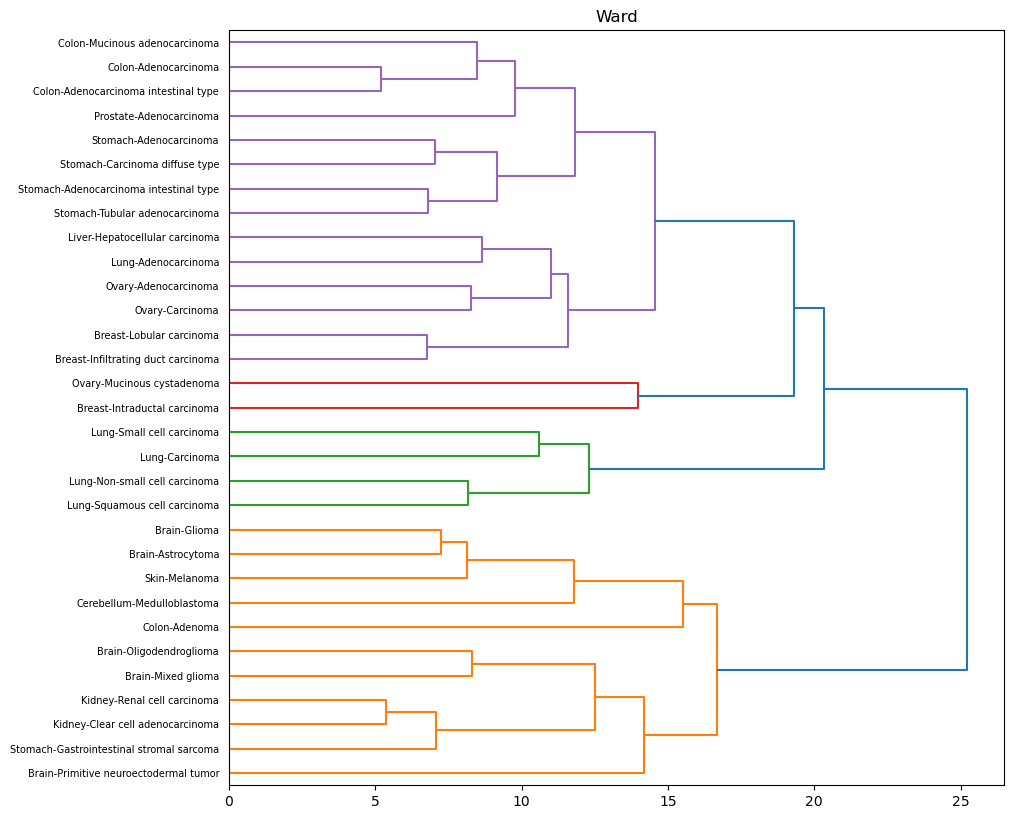

In [44]:
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(10,10))
plt.title('Ward')
dn = dendrogram(linked,
            orientation='right',
            labels=all_feat['label'].tolist(),
            distance_sort='ascending',
            leaf_font_size=7,
#             truncate_mode='level',
#             p = 3,
            show_leaf_counts=True)
plt.savefig('/Users/bogao/DataFiles/plots/newlandscape/dendrogram/cna_signature_dendrograph.pdf',bbox_inches='tight')

In [12]:
linked = linkage(data, 'average', optimal_ordering=True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

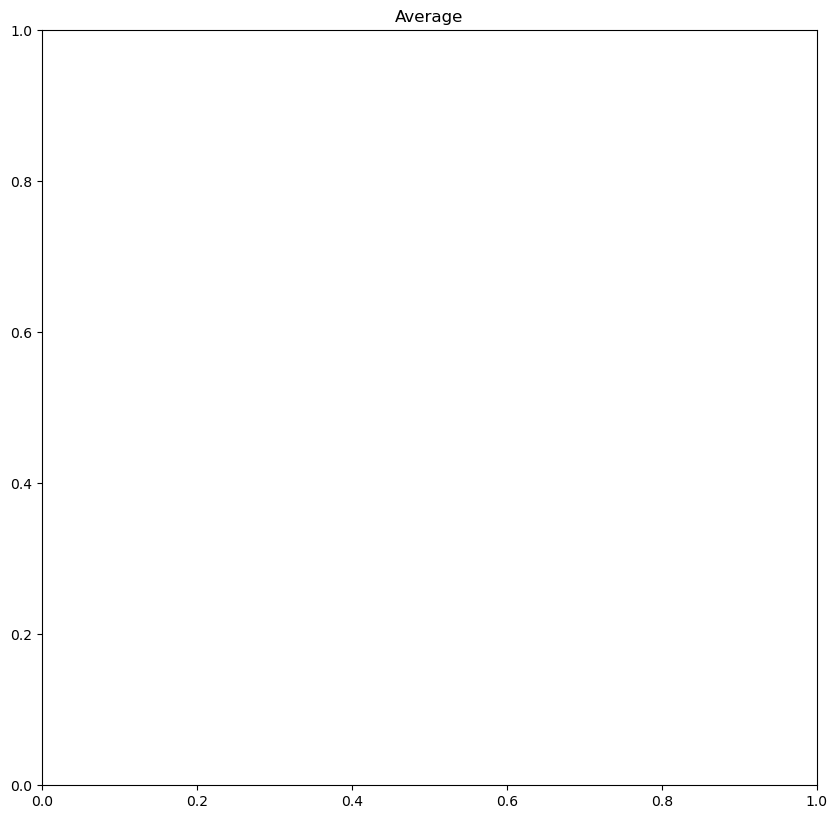

In [13]:
plt.figure(figsize=(10,10))
plt.title('Average')
dn = dendrogram(linked,
            orientation='right',
            labels=all_feat['label'].values,
            distance_sort='descending',
            leaf_font_size=7,
#             truncate_mode='level',
#             p = 3,
            show_leaf_counts=True)
# plt.savefig('/Users/bogao/Downloads/cna_signature_dendrograph.pdf',bbox_inches='tight')

In [25]:
linked = linkage(data, 'complete', optimal_ordering=True)

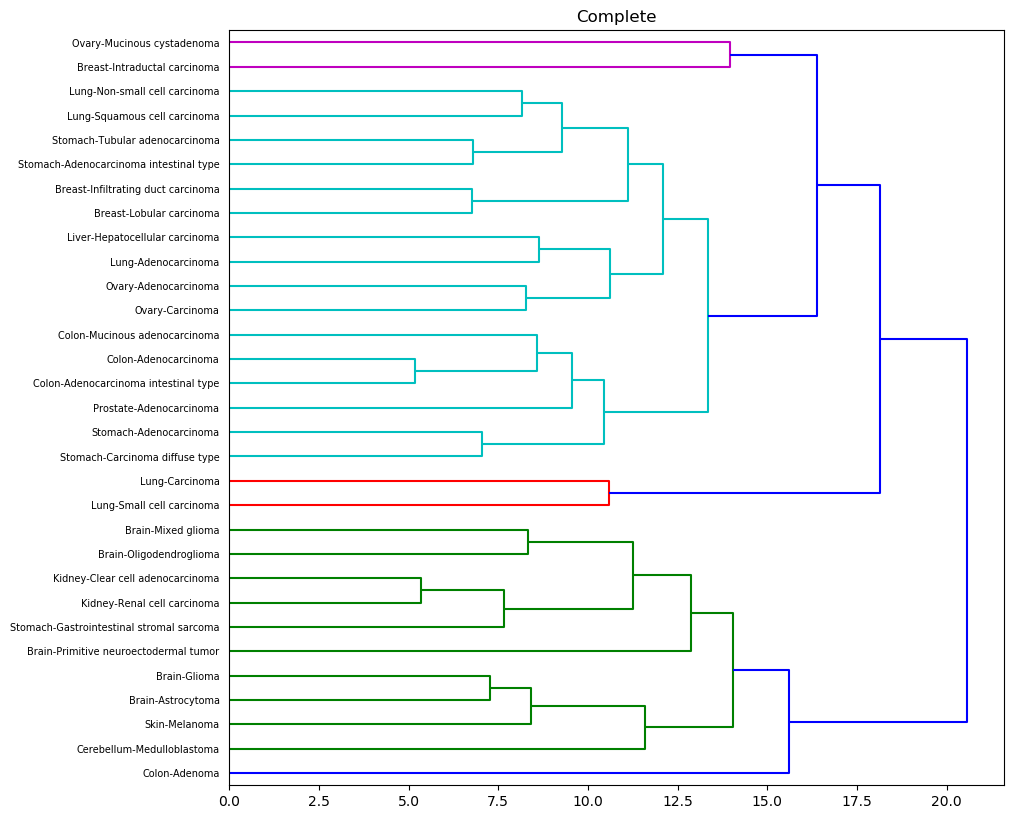

In [26]:
plt.figure(figsize=(10,10))
plt.title('Complete')
dn = dendrogram(linked,
            orientation='right',
            labels=all_feat['label'].values,
            distance_sort='descending',
            leaf_font_size=7,
#             truncate_mode='level',
#             p = 3,
            show_leaf_counts=True)
# plt.savefig('/Users/bogao/Downloads/cna_signature_dendrograph.pdf',bbox_inches='tight')

In [27]:
linked = linkage(data, 'weighted', optimal_ordering=True)

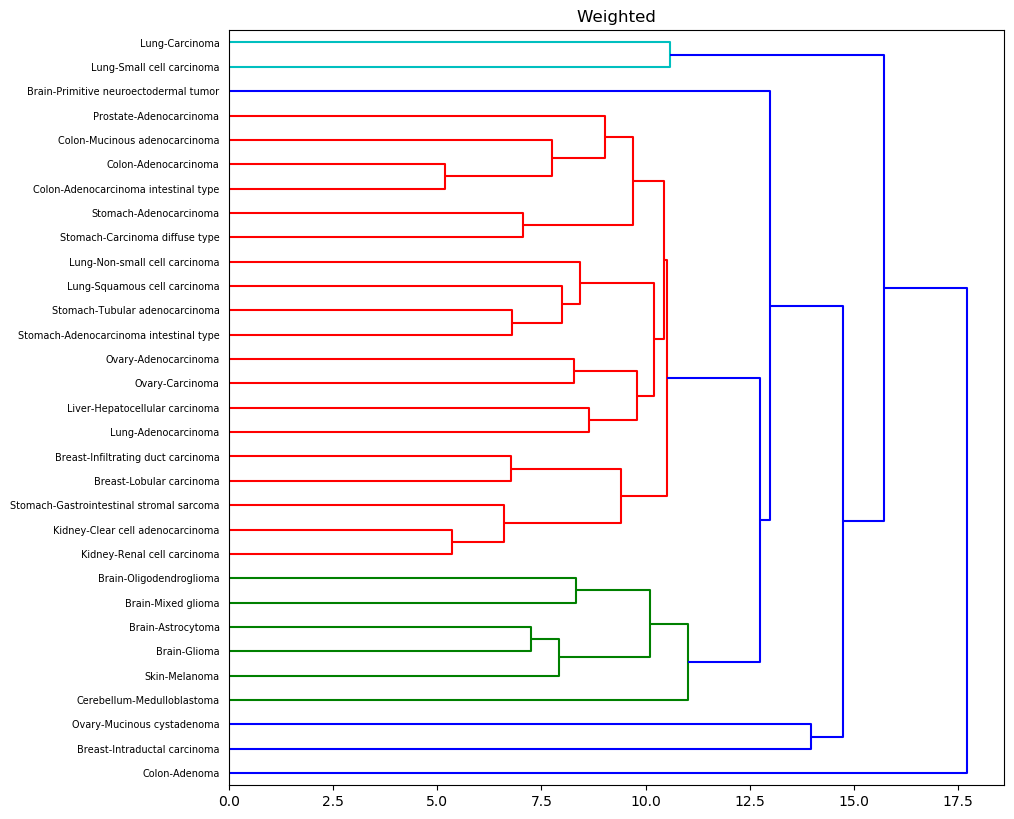

In [28]:
plt.figure(figsize=(10,10))
plt.title('Weighted')
dn = dendrogram(linked,
            orientation='right',
            labels=all_feat['label'].values,
#             distance_sort='descending',
            leaf_font_size=7,
#             truncate_mode='level',
#             p = 3,
            show_leaf_counts=True)
# plt.savefig('/Users/bogao/DataFiles/plots/newlandscape/dendrogram/cna_signature_dendrograph.pdf',bbox_inches='tight')

In [15]:
data.shape

(31, 2385)

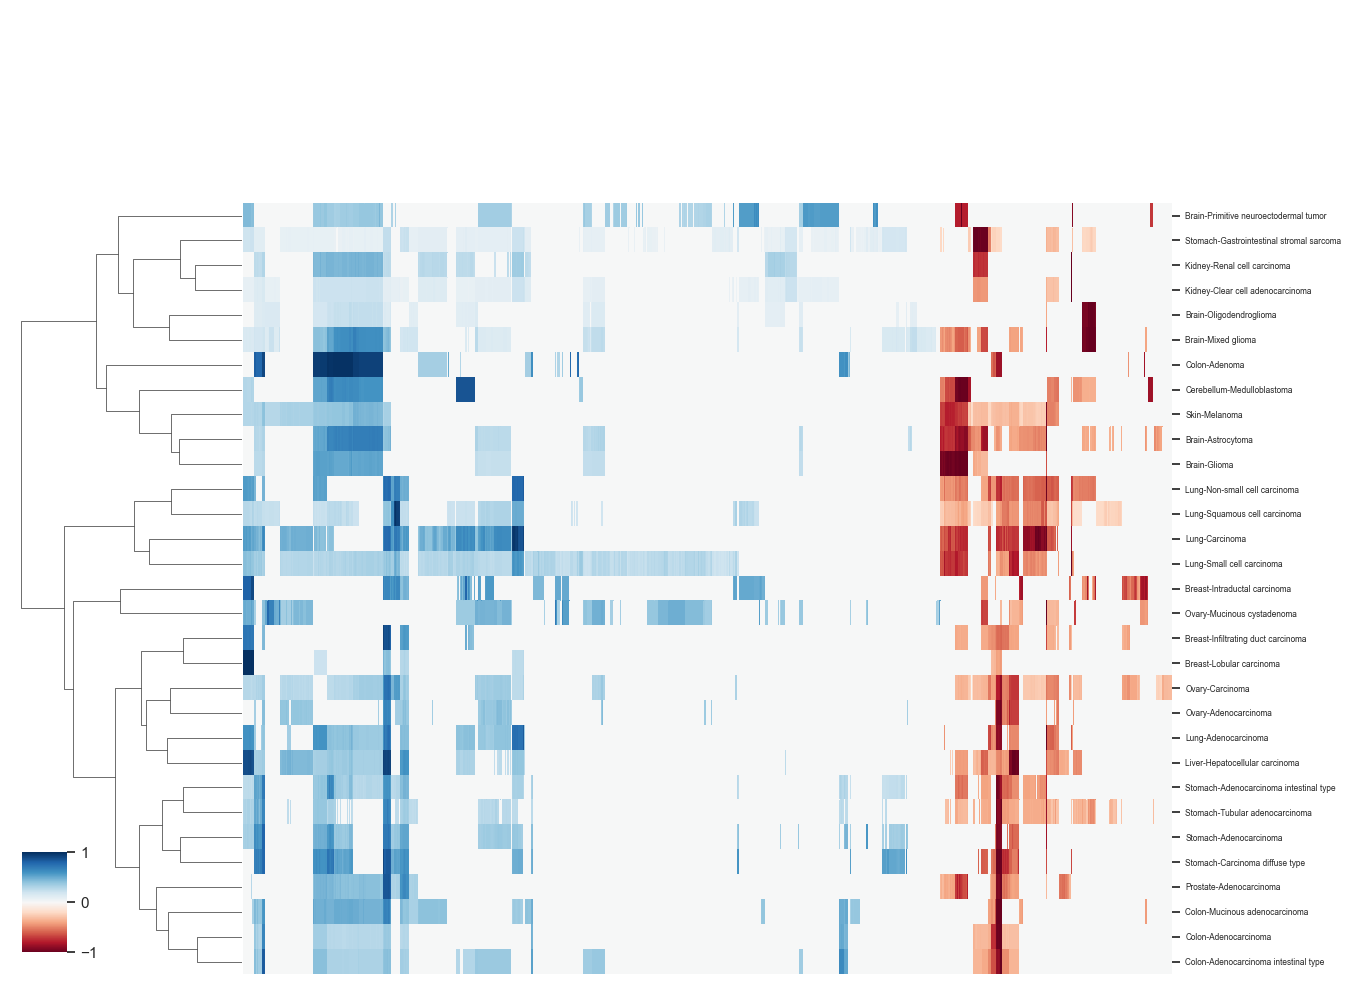

In [63]:
g = sns.clustermap(data, 
#                metric="correlation",
#                method="complete", 
               method="ward", 
               cmap="RdBu", 
               col_cluster=False, 
               xticklabels=False,
               yticklabels=all_feat['label'].values,
                   figsize= (15,10),
                   cbar_pos=(0.02, 0.04, .03, .1)
              )
g = g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 6)
plt.savefig('/Users/bogao/DataFiles/plots/newlandscape/dendrogram/cna_signature_heatmap.pdf',bbox_inches='tight')

/Users/bogao/anaconda3/envs/plot/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


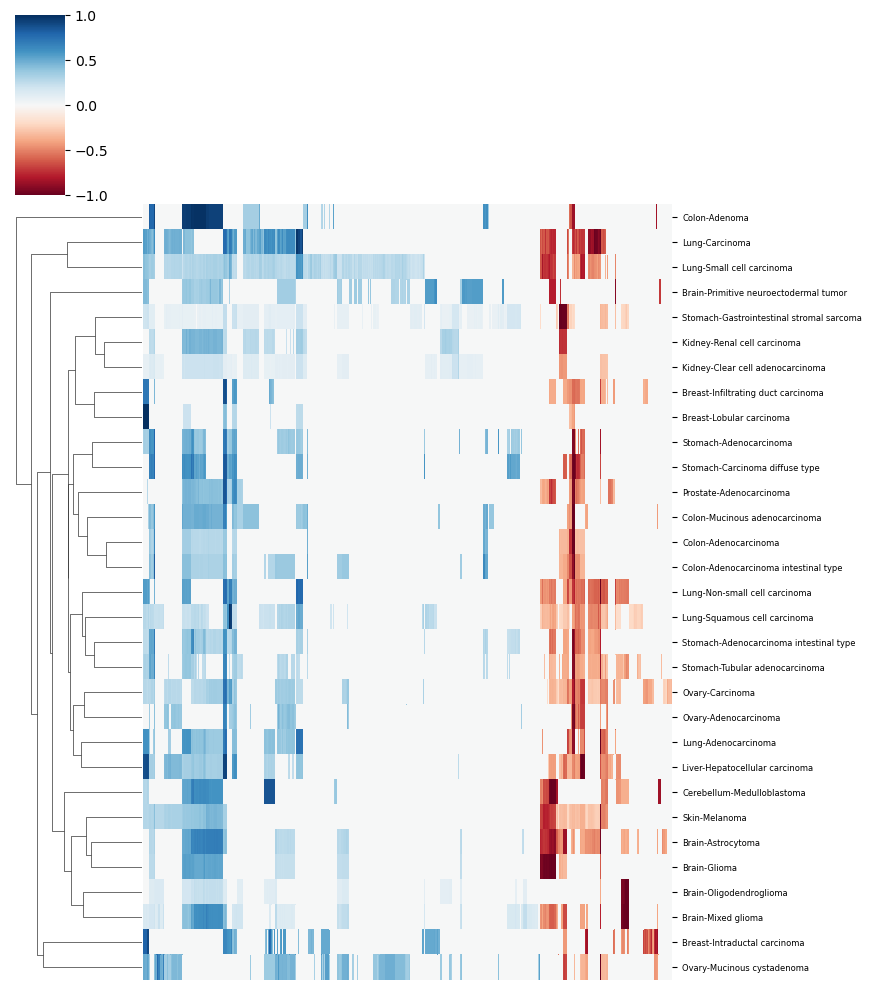

In [29]:
g = sns.clustermap(data, 
#                metric="correlation",
#                method="complete", 
               method="weighted", 
               cmap="RdBu", 
               col_cluster=False, 
               xticklabels=False,
               yticklabels=all_feat['label'].values,
              )
g = g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 6)
# plt.savefig('/Users/bogao/DataFiles/plots/newlandscape/dendrogram/cna_signature_heatmap.pdf',bbox_inches='tight')